In [100]:
from imutils  import face_utils
import numpy as np
import imutils
import dlib #얼굴검출기가 별도로 있어
import cv2
import matplotlib.pyplot as plt
import face_recognition #인식+검출기
import os
from imutils import paths

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

# Face Analysis

## Shape Keypoints 추출

In [2]:
predictor = dlib.shape_predictor("../../../../shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector() #얼굴검출기 Haar-like처럼 고속검출기. opencv보다 조금 느리지만 좀 더 정밀도 높음

In [60]:
frame = cv2.imread("img/face2.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray,0) #왼쪽좌표, 오른쪽좌표
print("Number of faces detected: {}".format(len(rects)))
for r in rects :
    print(r)

Number of faces detected: 5
[(413, 85) (485, 157)]
[(93, 77) (165, 149)]
[(333, 69) (405, 141)]
[(189, 53) (261, 125)]
[(245, 61) (317, 133)]


In [61]:
#얼굴의 keypoints
for k, d in enumerate(rects) :
    print("Detection {}: Left: {} Top: {} Right: {} Bottom {}".format(
    k, d.left(), d.top(), d.right(), d.bottom()))
    
    shape = predictor(gray, d)  #(영상, 좌표)
    shape = face_utils.shape_to_np(shape)  #객체의 좌표 정보들만 반환
    for (x,y) in shape:
        cv2.circle(frame, (x,y),2,(0,255,0),-1)

Detection 0: Left: 413 Top: 85 Right: 485 Bottom 157
Detection 1: Left: 93 Top: 77 Right: 165 Bottom 149
Detection 2: Left: 333 Top: 69 Right: 405 Bottom 141
Detection 3: Left: 189 Top: 53 Right: 261 Bottom 125
Detection 4: Left: 245 Top: 61 Right: 317 Bottom 133


In [62]:
print(rects[0])
print(predictor(gray, rects[0]))   #객체에 저장
print(face_utils.shape_to_np(predictor(gray, rects[0])))  #객체의 좌표 정보들
print(len(face_utils.shape_to_np(predictor(gray, rects[0]))),'개의 좌표들')

[(413, 85) (485, 157)]
[[427 115]
 [427 121]
 [428 128]
 [431 134]
 [434 141]
 [438 147]
 [442 154]
 [447 158]
 [454 160]
 [463 158]
 [471 153]
 [479 147]
 [486 140]
 [491 133]
 [492 124]
 [492 114]
 [491 104]
 [424 105]
 [426 102]
 [429 100]
 [433 100]
 [437 101]
 [445  98]
 [451  94]
 [459  92]
 [467  93]
 [473  97]
 [442 108]
 [441 113]
 [440 118]
 [440 123]
 [438 129]
 [441 130]
 [443 131]
 [447 129]
 [450 128]
 [429 113]
 [431 109]
 [435 108]
 [439 111]
 [435 112]
 [432 113]
 [453 107]
 [457 103]
 [461 102]
 [466 104]
 [462 106]
 [458 107]
 [439 142]
 [440 138]
 [442 136]
 [445 137]
 [447 135]
 [453 136]
 [459 138]
 [455 143]
 [450 145]
 [447 146]
 [444 146]
 [442 145]
 [441 142]
 [443 140]
 [446 140]
 [448 139]
 [457 139]
 [449 140]
 [446 141]
 [443 141]]
68 개의 좌표들


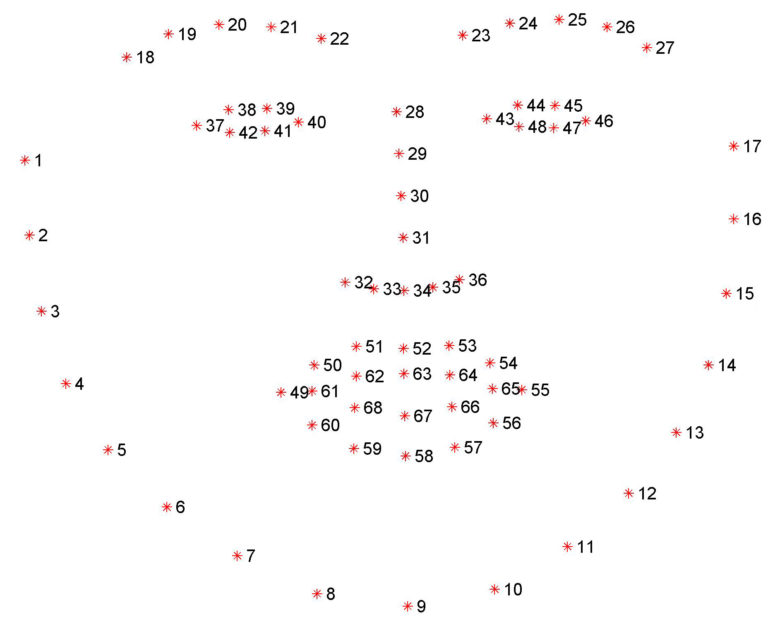

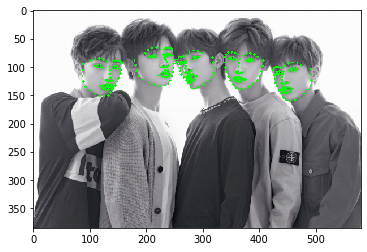

In [63]:
#cv2.imwrite("img/face_out.jpg", frame)
imshow("",frame)

### Practice: 눈 가운데에 점 찍기

In [66]:
frame = cv2.imread("img/face1.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray,0)

print("Number of faces detected: {}".format(len(rects)))
for r in rects :
    print(r)

for k, d in enumerate(rects) :
    print("Detection {}: Left: {} Top: {} Right: {} Bottom {}".format(
    k, d.left(), d.top(), d.right(), d.bottom()))
    
    shape = predictor(gray, d)  #(영상, 좌표)
    shape = face_utils.shape_to_np(shape)  #객체의 좌표 정보들만 반환

Number of faces detected: 1
[(37, 79) (162, 203)]
Detection 0: Left: 37 Top: 79 Right: 162 Bottom 203


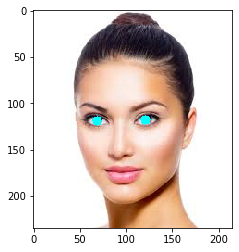

In [67]:
# 36~31 눈 가운데에 점 찍기
eyel = np.mean(shape[36:42], axis=0) #row합산
eyer = np.mean(shape[42:48], axis=0)
cv2.circle(frame, (int(eyel[0]), int(eyel[1])),5,(255,255,0),-1)
cv2.circle(frame, (int(eyer[0]), int(eyer[1])),5,(255,255,0),-1)

imshow("",frame)

## Face Recognition

굳이 칼라영상 안 써, 그레이 영상으로.

I found 5 face(s) in this photograph.


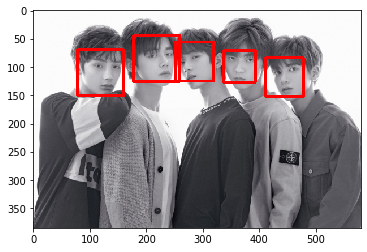

In [8]:
img = cv2.imread("img/face2.jpg")

face_locations = face_recognition.face_locations(img) #HOG algorithm
#face_locations = face_recognition.face_locations(img, model="cnn") #CNN algorithm, slower but more delicate
print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:
    top, right, bottom, left = face_location
    cv2.rectangle(img, (left,top), (right,bottom),(0,0,255),3)
imshow("",img)

I found 1 face(s) in this photograph.


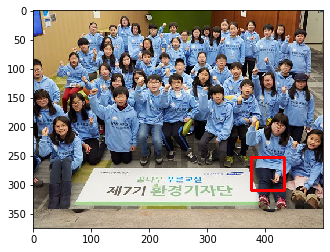

In [9]:
img = cv2.imread("img/group.jpg")

#face_locations = face_recognition.face_locations(img)
face_locations = face_recognition.face_locations(img, model="cnn")
print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:
    top, right, bottom, left = face_location
    cv2.rectangle(img, (left,top), (right,bottom),(0,0,255),3)
imshow("",img)

I found 0 face(s) in this photograph.


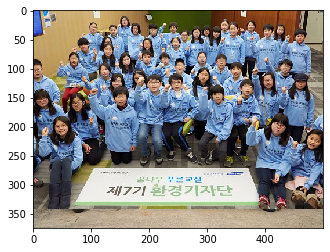

In [10]:
img = cv2.imread("img/group.jpg")

face_locations = face_recognition.face_locations(img)
#face_locations = face_recognition.face_locations(img, model="cnn")
print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:
    top, right, bottom, left = face_location
    cv2.rectangle(img, (left,top), (right,bottom),(0,0,255),3)
imshow("",img)

## Classification

In [73]:
img = face_recognition.load_image_file("img/face1.jpg")
face_encoding = face_recognition.face_encodings(img)
print(face_encoding[0].shape)
#한 사람의 특징. 이미지를 128차원으로 축소.(1차원 벡터) -> 추후 DNN으로 학습
#classification은 거리 가까운 순으로.
#mnist로 DNN했던 거랑 똑같아. db구성만 좀 달라지지. mnist는 28x28=784
print(face_encoding)

(128,)
[array([-1.74235269e-01,  5.58894277e-02,  6.34705722e-02, -6.96481466e-02,
       -1.76261559e-01, -6.03615716e-02, -1.32683009e-01, -1.30149066e-01,
        2.35021070e-01, -2.00881615e-01,  1.13087930e-01, -2.83933822e-02,
       -2.57812083e-01, -2.76947860e-02, -1.27820313e-01,  1.76038355e-01,
       -1.90144017e-01, -2.15656728e-01, -6.27713650e-02, -5.58692366e-02,
        4.76553589e-02,  7.31723662e-03,  4.47428487e-02,  9.52412188e-02,
       -1.06052645e-01, -4.21607375e-01, -5.73027804e-02, -7.19648600e-03,
       -5.76291196e-02, -1.42783374e-01,  3.01032700e-02,  8.21012631e-02,
       -2.35670134e-01,  2.21508741e-03, -4.79532108e-02,  2.20856160e-01,
        6.37219921e-02, -1.17685847e-01,  7.93085396e-02,  8.67318362e-03,
       -3.08931172e-01, -9.13110971e-02,  3.19480598e-02,  2.55818516e-01,
        1.78958133e-01, -7.65914796e-03, -2.82435436e-02, -1.24502786e-01,
        1.49445027e-01, -2.94277102e-01,  4.33598012e-02,  1.87926754e-01,
       -3.9599970

### 같은 얼굴 찾기

In [139]:
files = os.listdir("img/faces")

known_face_encodings = []
known_face_names = []


for filename in files:
    name, ext = os.path.splitext(filename)
    if ext == '.jpg' :
        known_face_names.append(name)
        pathname = os.path.join("img/faces", filename)
        img = face_recognition.load_image_file(pathname)
        face_encoding = face_recognition.face_encodings(img)[0]
        known_face_encodings.append(face_encoding)


In [141]:
print(known_face_names)
print(known_face_encodings[1])

['download01', 'download02', 'download03', 'download04', 'download05', 'download06', 'download07', 'download08', 'download09', 'download10', 'download11', 'download12', 'download14', 'download15', 'download16', 'download17']
[-0.09885168  0.06880263  0.04802168 -0.08391526 -0.12712239 -0.05466866
 -0.12785193 -0.1103171   0.13349177 -0.16012844  0.20327783 -0.12960398
 -0.19902658  0.00943401 -0.04896107  0.23399568 -0.17046995 -0.1493244
 -0.07303937  0.0189467   0.01732553  0.06076831 -0.02701496  0.07190914
 -0.11239883 -0.37208706 -0.08863934 -0.07036154  0.00450175 -0.04232929
 -0.07587428  0.06706958 -0.14923219 -0.03921098  0.08151289  0.11338171
  0.01795221 -0.07864395  0.16570958 -0.00991463 -0.32529682  0.05686255
  0.09854668  0.22796743  0.12863217  0.01961486  0.04584386 -0.17081302
  0.10720996 -0.14716642 -0.0079079   0.13939658  0.05636433  0.04635181
  0.02775776 -0.13548017  0.03708941  0.14784057 -0.15651084  0.02446978
  0.14148238 -0.04025874  0.02239683 -0.117657

In [142]:
test = face_recognition.load_image_file("img/faces_test.jpg")

face_locations = face_recognition.face_locations(test)
face_encodings = face_recognition.face_encodings(test, face_locations)

face_names = []
for face_encoding in face_encodings :
    distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    print(distances)
    min_value = min(distances)
    
    name = "unknown"
    if min_value < 0.6:
        index = np.argmin(distances)
        name = known_face_names[index]

print(name)

[0.49864701 0.45618233 0.59453172 0.56340606 0.42147897 0.49540881
 0.50613125 0.30585624 0.50250804 0.32485049 0.46050412 0.53886023
 0.5256142  0.30441893 0.50097711 0.34303809]
download15


### 얼굴 분류

In [174]:
imagePaths = list(paths.list_images("img/faces"))
 
knownEncodings = []
knownNames = []

for (i, imagePath) in enumerate(imagePaths):    
    name = imagePath.split(os.path.sep)[-2]  #뒤쪽2자리빼기
    print(f"{name}   -   {imagePath}") 
    image = cv2.imread(imagePath)
    boxes = face_recognition.face_locations(image)
    encodings = face_recognition.face_encodings(image, boxes) 

    for encoding in encodings:        
        knownEncodings.append(encoding)
        knownNames.append(name)
        
import pickle
data = {"encodings": knownEncodings, "names": knownNames} #둘 다 리스트
f = open("known.bin", "wb")  #binary 통채로 저장,불러들이는 방식
f.write(pickle.dumps(data))
f.close()        

gohyunjeong   -   img/faces\gohyunjeong\download06.jpg
gohyunjeong   -   img/faces\gohyunjeong\download21.jpg
gohyunjeong   -   img/faces\gohyunjeong\download22.jpg
hangain   -   img/faces\hangain\download03.jpg
hangain   -   img/faces\hangain\download25.jpg
hangain   -   img/faces\hangain\download26.jpg
hangain   -   img/faces\hangain\download27.png
jeonjihyun   -   img/faces\jeonjihyun\download01.jpg
jeonjihyun   -   img/faces\jeonjihyun\download12.jpg
jeonjihyun   -   img/faces\jeonjihyun\download15.jpg
jeonjihyun   -   img/faces\jeonjihyun\download16.jpg
jeonjihyun   -   img/faces\jeonjihyun\download17.jpg
jiyeon   -   img/faces\jiyeon\download09.jpg
jiyeon   -   img/faces\jiyeon\download27.jpg
jiyeon   -   img/faces\jiyeon\download28.jpg
jiyeon   -   img/faces\jiyeon\download29.jpg
songjihyo   -   img/faces\songjihyo\download16.jpg
songjihyo   -   img/faces\songjihyo\download23.png
songjihyo   -   img/faces\songjihyo\download24.jpg
suzy   -   img/faces\suzy\download08.jpg
suzy   -

In [171]:
#print(data["encodings"])
print(data["names"][0])
print(data["encodings"][0])

gohyunjeong
[-0.03321835  0.08674972  0.10301117 -0.10796804 -0.0958687   0.03547066
 -0.07932355 -0.12845019  0.15263009 -0.20619319  0.16518883 -0.08231562
 -0.21097383  0.0076662  -0.01595398  0.21591133 -0.17624605 -0.12955596
 -0.03642764  0.03080605  0.04100414  0.0338028  -0.01702144  0.03559918
 -0.14944987 -0.3253893  -0.13549626 -0.05301283 -0.09715259 -0.05470095
 -0.10593968  0.0396571  -0.09729487  0.01669058 -0.022835    0.06579462
 -0.07444087 -0.10253663  0.14296746  0.04532677 -0.28112635  0.06117592
  0.06548287  0.23338456  0.23462279  0.01168058 -0.01385867 -0.09289175
  0.14768423 -0.25381112  0.00173447  0.1388554  -0.00319617  0.1197226
  0.05003671 -0.07182425  0.03615413  0.12082937 -0.11524875  0.03643126
  0.10313072 -0.07513972  0.06382791 -0.07520697  0.21990511  0.15293074
 -0.12718576 -0.15143394  0.07378398 -0.16160116 -0.14405386  0.00907267
 -0.16867252 -0.18445799 -0.2567994  -0.03800271  0.34362251  0.16931622
 -0.18520883  0.0198058  -0.04808893 -0.

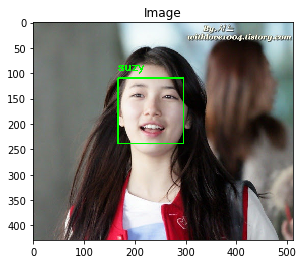

In [175]:
data = pickle.loads(open("known.bin", "rb").read())

image = cv2.imread("img/faces_test2.jpg")

boxes = face_recognition.face_locations(image)
encodings = face_recognition.face_encodings(image, boxes)

names = []
for encoding in encodings:
    matches = face_recognition.compare_faces(data["encodings"], encoding)
    name = "Unknown"
    if True in matches:  #리스트 안에서 하나라도 특정 값(true)이 있으면
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {} 
        for i in matchedIdxs:
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1  #name에 해당하는 element 불러오고 없으면 0 반환
        name = max(counts, key=counts.get)
    names.append(name)
for ((top, right, bottom, left), name) in zip(boxes, names): #zip:paring
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,  0.75, (0, 255, 0), 2)

imshow("Image", image)

In [176]:
#test
data = pickle.loads(open("known.bin", "rb").read())

image = cv2.imread("img/faces_test2.jpg")

boxes = face_recognition.face_locations(image)
encodings = face_recognition.face_encodings(image, boxes)

names = []

encoding=encodings[0]
matches = face_recognition.compare_faces(data["encodings"], encoding)
print(matches)

matchedIdxs = [i for (i, b) in enumerate(matches) if b]
print(matchedIdxs)

[True, True, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
[0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [165]:
for i in matchedIdxs:
    name = data["names"][i]
    counts[name] = counts.get(name, 0) + 1 
print(data["names"][11])

hangain


In [179]:
feature = np.array(data["encodings"])
print(feature.shape) #trained data: num of samples * dimension
print(feature)

(24, 128)
[[-0.03321835  0.08674972  0.10301117 ...  0.00131826  0.07200988
   0.03437196]
 [-0.03741852  0.01339122  0.01897655 ...  0.03241182  0.06713651
   0.00393573]
 [-0.03242807  0.06252519  0.0359463  ...  0.03196318 -0.01386773
   0.01020367]
 ...
 [-0.11596762  0.02101535  0.07276338 ... -0.04539192  0.06484824
   0.00397227]
 [-0.08105728  0.06316514  0.04811019 ... -0.07283989  0.06740704
  -0.03495155]
 [-0.13023604  0.04378028  0.0787772  ... -0.08678484  0.06275607
   0.01521643]]
